In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import date
from dateutil.parser import parse
import numpy as np
from sklearn import preprocessing
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import graphviz
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Datasets/080119_pk and carmudi_complete.csv')

In [5]:
df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Version,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age
0,CAR006117,White Hyundai Grand Starex 2010 for sale in Ma...,665000,Hyundai,GrandStarex,2010,Yes,Manual,White,1.0,...,NaN,Hyundai Grand Starex 2010 Manual Used for sale...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,HyundaiGrandStarex,2060000,71
1,CAR006652,Selling Red Mitsubishi Mirage G4 2018 in Cainta,528000,Mitsubishi,MirageG4,2018,Yes,Automatic,Red,1.0,...,NaN,Mitsubishi supplies only the best quality vehi...,Gary Reyes,Individual,NaN,Pasig,10/07/2019,MitsubishiMirageG4,735000,22
2,CAR013853,Sell Silver 2011 Toyota Innova in General Sali...,595000,Toyota,Innova,2011,Yes,Manual,Silver,1.0,...,NaN,Toyota Innova 2011 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
3,CAR013855,Red Toyota Innova 2012 Manual Gasoline for sal...,495000,Toyota,Innova,2012,Yes,Manual,Red,1.0,...,NaN,Toyota Innova 2012 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
4,CAR014563,1989 Mercedes-Benz 260E 2.6 AT,255000,Mercedes-Benz,260E,1989,Yes,Automatic,Red,1.0,...,2.6,The 1989 Mercedes-Benz 260E with an Automatic ...,Autofairway - Ric Pandanan,Dealer,Gasoline,Las Pinas,31/05/2019,Mercedes-Benz260E,0,62


,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Version,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age
0,CAR006117,White Hyundai Grand Starex 2010 for sale in Ma...,665000,Hyundai,GrandStarex,2010,Yes,Manual,White,1.0,...,NaN,Hyundai Grand Starex 2010 Manual Used for sale...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,HyundaiGrandStarex,2060000,71
1,CAR006652,Selling Red Mitsubishi Mirage G4 2018 in Cainta,528000,Mitsubishi,MirageG4,2018,Yes,Automatic,Red,1.0,...,NaN,Mitsubishi supplies only the best quality vehi...,Gary Reyes,Individual,NaN,Pasig,10/07/2019,MitsubishiMirageG4,735000,22
2,CAR013853,Sell Silver 2011 Toyota Innova in General Sali...,595000,Toyota,Innova,2011,Yes,Manual,Silver,1.0,...,NaN,Toyota Innova 2011 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
3,CAR013855,Red Toyota Innova 2012 Manual Gasoline for sal...,495000,Toyota,Innova,2012,Yes,Manual,Red,1.0,...,NaN,Toyota Innova 2012 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
4,CAR014563,1989 Mercedes-Benz 260E 2.6 AT,255000,Mercedes-Benz,260E,1989,Yes,Automatic,Red,1.0,...,2.6,The 1989 Mercedes-Benz 260E with an Automatic ...,Autofairway - Ric Pandanan,Dealer,Gasoline,Las Pinas,31/05/2019,Mercedes-Benz260E,0,62


## EDA

In [6]:
final_df=df.copy()

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 21 columns):
ID                     20088 non-null object
Title                  20088 non-null object
Price                  20088 non-null int64
Brand                  20088 non-null object
Model                  20088 non-null object
Year of Manufacture    20088 non-null int64
Used                   20088 non-null object
Transmission           20088 non-null object
Color Family           18822 non-null object
Mileage (in km)        15561 non-null float64
Body Type              20088 non-null object
Version                5989 non-null object
Description            20026 non-null object
Poster                 19772 non-null object
Poster Type            20088 non-null object
Fuel Type              16921 non-null object
Location.2             20088 non-null object
Date Posted            20088 non-null object
name                   20088 non-null object
retail                 20088 non-null 

In [8]:
#replaced null color values as 'No Color'. Same for fuel type.
final_df['Color Family']=final_df['Color Family'].fillna('Other') #('No Color')
final_df['Fuel Type']=final_df['Fuel Type'].fillna('No Fuel Type')

In [9]:
final_df['age_of_car']=2019-final_df['Year of Manufacture']
final_df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age,age_of_car
0,CAR006117,White Hyundai Grand Starex 2010 for sale in Ma...,665000,Hyundai,GrandStarex,2010,Yes,Manual,White,1.0,...,Hyundai Grand Starex 2010 Manual Used for sale...,Lito Palcone,Individual,No Fuel Type,General Salipada K. Pendatun,22/05/2019,HyundaiGrandStarex,2060000,71,9
1,CAR006652,Selling Red Mitsubishi Mirage G4 2018 in Cainta,528000,Mitsubishi,MirageG4,2018,Yes,Automatic,Red,1.0,...,Mitsubishi supplies only the best quality vehi...,Gary Reyes,Individual,No Fuel Type,Pasig,10/07/2019,MitsubishiMirageG4,735000,22,1
2,CAR013853,Sell Silver 2011 Toyota Innova in General Sali...,595000,Toyota,Innova,2011,Yes,Manual,Silver,1.0,...,Toyota Innova 2011 Manual Used for sale. The T...,Lito Palcone,Individual,No Fuel Type,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71,8
3,CAR013855,Red Toyota Innova 2012 Manual Gasoline for sal...,495000,Toyota,Innova,2012,Yes,Manual,Red,1.0,...,Toyota Innova 2012 Manual Used for sale. The T...,Lito Palcone,Individual,No Fuel Type,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71,7
4,CAR014563,1989 Mercedes-Benz 260E 2.6 AT,255000,Mercedes-Benz,260E,1989,Yes,Automatic,Red,1.0,...,The 1989 Mercedes-Benz 260E with an Automatic ...,Autofairway - Ric Pandanan,Dealer,Gasoline,Las Pinas,31/05/2019,Mercedes-Benz260E,0,62,30


,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age,age_of_car
0,CAR006117,White Hyundai Grand Starex 2010 for sale in Ma...,665000,Hyundai,GrandStarex,2010,Yes,Manual,White,1.0,...,Hyundai Grand Starex 2010 Manual Used for sale...,Lito Palcone,Individual,No Fuel Type,General Salipada K. Pendatun,22/05/2019,HyundaiGrandStarex,2060000,71,9
1,CAR006652,Selling Red Mitsubishi Mirage G4 2018 in Cainta,528000,Mitsubishi,MirageG4,2018,Yes,Automatic,Red,1.0,...,Mitsubishi supplies only the best quality vehi...,Gary Reyes,Individual,No Fuel Type,Pasig,10/07/2019,MitsubishiMirageG4,735000,22,1
2,CAR013853,Sell Silver 2011 Toyota Innova in General Sali...,595000,Toyota,Innova,2011,Yes,Manual,Silver,1.0,...,Toyota Innova 2011 Manual Used for sale. The T...,Lito Palcone,Individual,No Fuel Type,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71,8
3,CAR013855,Red Toyota Innova 2012 Manual Gasoline for sal...,495000,Toyota,Innova,2012,Yes,Manual,Red,1.0,...,Toyota Innova 2012 Manual Used for sale. The T...,Lito Palcone,Individual,No Fuel Type,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71,7
4,CAR014563,1989 Mercedes-Benz 260E 2.6 AT,255000,Mercedes-Benz,260E,1989,Yes,Automatic,Red,1.0,...,The 1989 Mercedes-Benz 260E with an Automatic ...,Autofairway - Ric Pandanan,Dealer,Gasoline,Las Pinas,31/05/2019,Mercedes-Benz260E,0,62,30


In [12]:
#deleted Poster, Version and Description
final_df.drop(columns=['Poster','Version','Description','Title','Used','name','Date Posted','Year of Manufacture'],inplace=True,axis=1)

In [13]:
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
0,CAR006117,665000,Hyundai,GrandStarex,Manual,White,1.0,Van / Minivan / Minibus,Individual,No Fuel Type,General Salipada K. Pendatun,2060000,71,9
1,CAR006652,528000,Mitsubishi,MirageG4,Automatic,Red,1.0,Saloon / Sedan,Individual,No Fuel Type,Pasig,735000,22,1
2,CAR013853,595000,Toyota,Innova,Manual,Silver,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,8
3,CAR013855,495000,Toyota,Innova,Manual,Red,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,7
4,CAR014563,255000,Mercedes-Benz,260E,Automatic,Red,1.0,Saloon / Sedan,Dealer,Gasoline,Las Pinas,0,62,30


,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
0,CAR006117,665000,Hyundai,GrandStarex,Manual,White,1.0,Van / Minivan / Minibus,Individual,No Fuel Type,General Salipada K. Pendatun,2060000,71,9
1,CAR006652,528000,Mitsubishi,MirageG4,Automatic,Red,1.0,Saloon / Sedan,Individual,No Fuel Type,Pasig,735000,22,1
2,CAR013853,595000,Toyota,Innova,Manual,Silver,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,8
3,CAR013855,495000,Toyota,Innova,Manual,Red,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,7
4,CAR014563,255000,Mercedes-Benz,260E,Automatic,Red,1.0,Saloon / Sedan,Dealer,Gasoline,Las Pinas,0,62,30


In [14]:
final_df['Location.2'].value_counts()

Quezon City                     2975
Manila                          1892
Quezon                          1813
Makati                          1407
Philippines                     1271
Pasig                           1145
Paranaque                        865
Cebu City                        591
Las Pinas                        590
Marikina                         429
Taguig                           301
Muntinlupa                       300
Mandaue                          263
Cainta                           257
San Fernando                     257
Antipolo                         256
Mandaluyong                      237
Pasay                            210
Santiago                         191
Angeles                          183
General Salipada K. Pendatun     168
Caloocan                         166
Bacoor                           161
Davao City                       141
Meycauayan                       139
Valenzuela                       139
Dasmarinas                       115
I

Quezon City                     2975
Manila                          1892
Quezon                          1813
Makati                          1407
Philippines                     1271
Pasig                           1145
Paranaque                        865
Cebu City                        591
Las Pinas                        590
Marikina                         429
Taguig                           301
Muntinlupa                       300
Mandaue                          263
Cainta                           257
San Fernando                     257
Antipolo                         256
Mandaluyong                      237
Pasay                            210
Santiago                         191
Angeles                          183
General Salipada K. Pendatun     168
Caloocan                         166
Bacoor                           161
Davao City                       141
Meycauayan                       139
Valenzuela                       139
Dasmarinas                       115
I

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 14 columns):
ID                 20088 non-null object
Price              20088 non-null int64
Brand              20088 non-null object
Model              20088 non-null object
Transmission       20088 non-null object
Color Family       20088 non-null object
Mileage (in km)    15561 non-null float64
Body Type          20088 non-null object
Poster Type        20088 non-null object
Fuel Type          20088 non-null object
Location.2         20088 non-null object
retail             20088 non-null int64
Post Age           20088 non-null int64
age_of_car         20088 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 14 columns):
ID                 20088 non-null object
Price              20088 non-null int64
Brand              20088 non-null object
Model              20088 no

In [16]:
final_df.describe()

,Price,Mileage (in km),retail,Post Age,age_of_car
count,2.008800e+04,1.556100e+04,2.008800e+04,20088.000000,20088.000000
mean,8.141697e+05,5.277123e+04,1.323538e+06,52.494524,6.521356
std,1.456741e+06,5.715313e+04,1.245114e+06,40.327707,5.719296
min,5.000000e+03,1.000000e+00,0.000000e+00,5.000000,-1.000000
25%,3.680000e+05,1.900000e+04,7.587500e+05,27.000000,2.000000
50%,5.680000e+05,4.316400e+04,1.032000e+06,37.000000,5.000000
75%,8.880000e+05,7.500000e+04,1.607000e+06,67.000000,9.000000
max,1.234568e+08,3.000000e+06,2.355000e+07,1017.000000,57.000000


,Price,Mileage (in km),retail,Post Age,age_of_car
count,2.008800e+04,1.556100e+04,2.008800e+04,20088.000000,20088.000000
mean,8.141697e+05,5.277123e+04,1.323538e+06,52.494524,6.521356
std,1.456741e+06,5.715313e+04,1.245114e+06,40.327707,5.719296
min,5.000000e+03,1.000000e+00,0.000000e+00,5.000000,-1.000000
25%,3.680000e+05,1.900000e+04,7.587500e+05,27.000000,2.000000
50%,5.680000e+05,4.316400e+04,1.032000e+06,37.000000,5.000000
75%,8.880000e+05,7.500000e+04,1.607000e+06,67.000000,9.000000
max,1.234568e+08,3.000000e+06,2.355000e+07,1017.000000,57.000000


In [17]:
final_df=final_df[final_df['age_of_car']>=0]
final_df=final_df[final_df['retail']>0]
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
0,CAR006117,665000,Hyundai,GrandStarex,Manual,White,1.0,Van / Minivan / Minibus,Individual,No Fuel Type,General Salipada K. Pendatun,2060000,71,9
1,CAR006652,528000,Mitsubishi,MirageG4,Automatic,Red,1.0,Saloon / Sedan,Individual,No Fuel Type,Pasig,735000,22,1
2,CAR013853,595000,Toyota,Innova,Manual,Silver,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,8
3,CAR013855,495000,Toyota,Innova,Manual,Red,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,7
6,CAR014569,250000,Mazda,B2200,Manual,White,1.0,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27


,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
0,CAR006117,665000,Hyundai,GrandStarex,Manual,White,1.0,Van / Minivan / Minibus,Individual,No Fuel Type,General Salipada K. Pendatun,2060000,71,9
1,CAR006652,528000,Mitsubishi,MirageG4,Automatic,Red,1.0,Saloon / Sedan,Individual,No Fuel Type,Pasig,735000,22,1
2,CAR013853,595000,Toyota,Innova,Manual,Silver,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,8
3,CAR013855,495000,Toyota,Innova,Manual,Red,1.0,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,7
6,CAR014569,250000,Mazda,B2200,Manual,White,1.0,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27


## Check the Data Some More

In [18]:
x=final_df['Mileage (in km)']
y=final_df['age_of_car']

In [19]:
#isolate x and y values that have mileage values in. In other words, we removed blank mileage records.
x_val=final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()]
y_val=final_df['age_of_car'].loc[~final_df['Mileage (in km)'].isnull()]

(0, 1000000)

(0, 1000000)

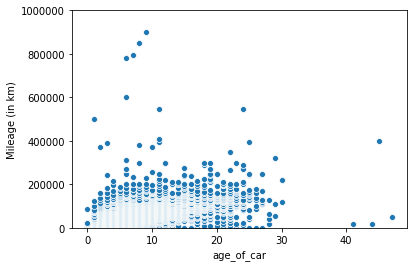

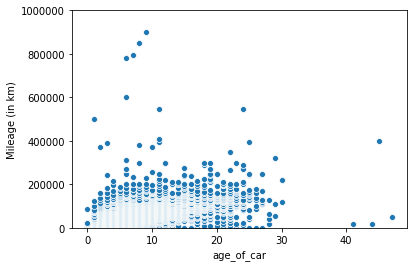

In [20]:
sns.scatterplot(y,x,data=final_df)
plt.ylim(0,1000000)

In [21]:
"""
Age and mileage should be directly correlated
Check normal distribution curve per brand
"""

'\nAge and mileage should be directly correlated\nCheck normal distribution curve per brand\n'

'\nAge and mileage should be directly correlated\nCheck normal distribution curve per brand\n'

In [22]:
x_val_trim=x_val[x_val<700000]
y_val_trim=y_val[x_val<700000]

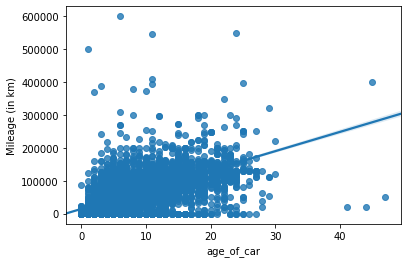

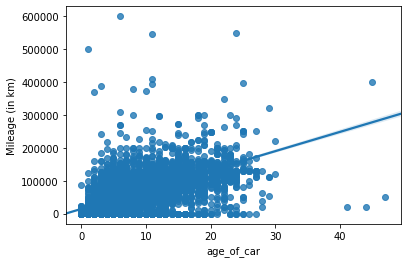

In [23]:
sns.regplot(y_val_trim,x_val_trim,data=final_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_val_trim,x_val_trim)

In [24]:
print(slope)
print(p_value)

5863.1674832080125
0.0
5863.1674832080125
0.0


## Impute Mileage Using KNN

In [25]:
#gets the age of car with no null values in the mileage
X=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].notnull()])
#gets the age of car with null values in the mileage
X_null=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].isnull()])
#gets the mileage with no null values in the mileage
y=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()])
#gets the mileage with null values in the mileage
y_null=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].isnull()])

In [26]:
#might have to double check the neighbors
clf=KNeighborsRegressor(3,weights='distance')
trained_model=clf.fit(X,y)

In [27]:
#predicting imputed values and setting the index to match the X_null dataframe
imputed_val=pd.DataFrame(trained_model.predict(X_null),columns=['Mileage (in km)'])
X_null.reset_index(inplace=True)

In [28]:
#merge imputed values with your Yr of Manufacture pair
null_merged=pd.merge(X_null,imputed_val,how='outer',on=X_null.index)
#deleted useless key column that came from  the mileage dataframe
null_merged.drop('key_0',inplace=True,axis=1)
#index of Yr of Manufacture is set as the index
null_merged.set_index('index',inplace=True)

In [29]:
# merged them all together (Yr of Manufacture and Mileage) non null records
xy_merged=pd.concat([X,y],axis=1)
# merged the non nulls with the imputed or previous nulls
merged_df=pd.concat([null_merged,xy_merged],axis=0)
# rearranged indedx so it's prettier
merged_df=merged_df.sort_index()
merged_df.head()

,age_of_car,Mileage (in km)
0,9,1.0
1,1,1.0
2,8,1.0
3,7,1.0
6,27,1.0


,age_of_car,Mileage (in km)
0,9,1.0
1,1,1.0
2,8,1.0
3,7,1.0
6,27,1.0


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 20087
Data columns (total 2 columns):
age_of_car         18288 non-null int64
Mileage (in km)    18288 non-null float64
dtypes: float64(1), int64(1)
memory usage: 428.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 20087
Data columns (total 2 columns):
age_of_car         18288 non-null int64
Mileage (in km)    18288 non-null float64
dtypes: float64(1), int64(1)
memory usage: 428.6 KB


In [31]:
# merge it with the whole df but original null mileage and age is still there
total_merge=pd.merge(final_df,merged_df,on=final_df.index)
# dropped the original null mileage and age. The new boys are in town!
total_merge.drop(['age_of_car_x','Mileage (in km)_x','key_0'],axis=1,inplace=True)
#renamed them
total_merge.columns=['id','price','brand','model','transmission','color','body_type','poster_type','fuel_type','location','retail','post_age_in_days','age_of_car','mileage_in_km']
total_merge.head()

,id,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
0,CAR006117,665000,Hyundai,GrandStarex,Manual,White,Van / Minivan / Minibus,Individual,No Fuel Type,General Salipada K. Pendatun,2060000,71,9,1.0
1,CAR006652,528000,Mitsubishi,MirageG4,Automatic,Red,Saloon / Sedan,Individual,No Fuel Type,Pasig,735000,22,1,1.0
2,CAR013853,595000,Toyota,Innova,Manual,Silver,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,8,1.0
3,CAR013855,495000,Toyota,Innova,Manual,Red,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,7,1.0
4,CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27,1.0


,id,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
0,CAR006117,665000,Hyundai,GrandStarex,Manual,White,Van / Minivan / Minibus,Individual,No Fuel Type,General Salipada K. Pendatun,2060000,71,9,1.0
1,CAR006652,528000,Mitsubishi,MirageG4,Automatic,Red,Saloon / Sedan,Individual,No Fuel Type,Pasig,735000,22,1,1.0
2,CAR013853,595000,Toyota,Innova,Manual,Silver,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,8,1.0
3,CAR013855,495000,Toyota,Innova,Manual,Red,MPV / AUV,Individual,No Fuel Type,General Salipada K. Pendatun,1025000,71,7,1.0
4,CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27,1.0


## Time to change categorical values to numerical...

In [32]:
total_merge.info()
#object means it's a categorical value or text

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 18287
Data columns (total 14 columns):
id                  18288 non-null object
price               18288 non-null int64
brand               18288 non-null object
model               18288 non-null object
transmission        18288 non-null object
color               18288 non-null object
body_type           18288 non-null object
poster_type         18288 non-null object
fuel_type           18288 non-null object
location            18288 non-null object
retail              18288 non-null int64
post_age_in_days    18288 non-null int64
age_of_car          18288 non-null int64
mileage_in_km       18288 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 18287
Data columns (total 14 columns):
id                  18288 non-null object
price               18288 non-null int64
brand               18288 non-null object
model     

In [33]:
#used label encoder to change cat to num
le = preprocessing.LabelEncoder()

In [ ]:
# tm_col = ['brand','model','transmission','color','body_type','poster_type','fuel_type','location']
# le_classes = {}
# for col in tm_col:
#     total_merge[col]=le.fit_transform(total_merge[col])
#     le_classes.update({col: le.classes_})

In [34]:
# set it in the column itself to transform the dataframe into numbers and also making a dictionary so you can "unlock" the encoder with categorical values=
tm_col = ['brand','model','transmission','color','body_type','poster_type','fuel_type','location']
le_classes = {}
for col in tm_col:
    total_merge[col]=le.fit_transform(total_merge[col])
    le_classes.update({col: {le.classes_[n]:n for n in range(len(le.classes_))}})

In [35]:
le_classes

{'brand': {'Aston Martin': 0,
  'Audi': 1,
  'BMW': 2,
  'Bentley': 3,
  'Bmw': 4,
  'Byd': 5,
  'Cadillac': 6,
  'Chevrolet': 7,
  'Chrysler': 8,
  'Dodge': 9,
  'Ferrari': 10,
  'Ford': 11,
  'Foton': 12,
  'Gmc': 13,
  'Great Wall': 14,
  'Honda': 15,
  'Hummer': 16,
  'Hyundai': 17,
  'Infiniti': 18,
  'Isuzu': 19,
  'Jaguar': 20,
  'Jeep': 21,
  'Kia': 22,
  'King Long': 23,
  'Lamborghini': 24,
  'Land Rover': 25,
  'Lexus': 26,
  'Lotus': 27,
  'Mahindra': 28,
  'Maserati': 29,
  'Mazda': 30,
  'Mercedes-Benz': 31,
  'Mini': 32,
  'Mitsubishi': 33,
  'Nissan': 34,
  'Peugeot': 35,
  'Porsche': 36,
  'Ssangyong': 37,
  'Subaru': 38,
  'Suzuki': 39,
  'Tata': 40,
  'Toyota': 41,
  'Volkswagen': 42,
  'Volvo': 43},
 'model': {'1': 0,
  '116i': 1,
  '118D': 2,
  '118I': 3,
  '118d': 4,
  '118i': 5,
  '120D': 6,
  '120I': 7,
  '120d': 8,
  '2': 9,
  '2008': 10,
  '218i': 11,
  '3': 12,
  '3008': 13,
  '300C': 14,
  '301': 15,
  '308': 16,
  '316i': 17,
  '318D': 18,
  '318I': 19,
  '

{'brand': {'Aston Martin': 0,
  'Audi': 1,
  'BMW': 2,
  'Bentley': 3,
  'Bmw': 4,
  'Byd': 5,
  'Cadillac': 6,
  'Chevrolet': 7,
  'Chrysler': 8,
  'Dodge': 9,
  'Ferrari': 10,
  'Ford': 11,
  'Foton': 12,
  'Gmc': 13,
  'Great Wall': 14,
  'Honda': 15,
  'Hummer': 16,
  'Hyundai': 17,
  'Infiniti': 18,
  'Isuzu': 19,
  'Jaguar': 20,
  'Jeep': 21,
  'Kia': 22,
  'King Long': 23,
  'Lamborghini': 24,
  'Land Rover': 25,
  'Lexus': 26,
  'Lotus': 27,
  'Mahindra': 28,
  'Maserati': 29,
  'Mazda': 30,
  'Mercedes-Benz': 31,
  'Mini': 32,
  'Mitsubishi': 33,
  'Nissan': 34,
  'Peugeot': 35,
  'Porsche': 36,
  'Ssangyong': 37,
  'Subaru': 38,
  'Suzuki': 39,
  'Tata': 40,
  'Toyota': 41,
  'Volkswagen': 42,
  'Volvo': 43},
 'model': {'1': 0,
  '116i': 1,
  '118D': 2,
  '118I': 3,
  '118d': 4,
  '118i': 5,
  '120D': 6,
  '120I': 7,
  '120d': 8,
  '2': 9,
  '2008': 10,
  '218i': 11,
  '3': 12,
  '3008': 13,
  '300C': 14,
  '301': 15,
  '308': 16,
  '316i': 17,
  '318D': 18,
  '318I': 19,
  '

In [36]:
#made the dataframe prettier by moving the id as index and deleting that pesky id title
total_merge.set_index('id',inplace=True)
total_merge.rename_axis(index=None,inplace=True)
total_merge.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR006117,665000,17,196,3,20,7,1,3,148,2060000,71,9,1.0
CAR006652,528000,33,259,1,16,6,1,3,279,735000,22,1,1.0
CAR013853,595000,41,217,3,17,3,1,3,148,1025000,71,8,1.0
CAR013855,495000,41,217,3,16,3,1,3,148,1025000,71,7,1.0
CAR014569,250000,30,81,3,20,4,0,0,229,991800,62,27,1.0


,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR006117,665000,17,196,3,20,7,1,3,148,2060000,71,9,1.0
CAR006652,528000,33,259,1,16,6,1,3,279,735000,22,1,1.0
CAR013853,595000,41,217,3,17,3,1,3,148,1025000,71,8,1.0
CAR013855,495000,41,217,3,16,3,1,3,148,1025000,71,7,1.0
CAR014569,250000,30,81,3,20,4,0,0,229,991800,62,27,1.0


In [37]:
# I just reassigned just cause lol
final_df=total_merge.copy()

In [38]:
final_df.to_csv("Datasets/capstone_dataset.csv")

## Maybe we can try imputing Mileage using median... Next time na lang haha

In [ ]:
#final_df['mileage_in_km'].fillna(final_df.groupby('year_of_manufacture')['mileage_in_km'].transform('median'),inplace=True)

In [ ]:
#final_df['mileage_in_km'].fillna(final_df['mileage_in_km'].median(),inplace=True)

In [ ]:
#final_df[['mileage_in_km']].head()

## Model

## It's time for Decision Trees?! So we know how they split </3

In [39]:
# Assigned features except for price to X and assigned price to y
X=final_df.drop(['price'],axis=1)
y=final_df['price']

In [40]:
X.head()

,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR006117,17,196,3,20,7,1,3,148,2060000,71,9,1.0
CAR006652,33,259,1,16,6,1,3,279,735000,22,1,1.0
CAR013853,41,217,3,17,3,1,3,148,1025000,71,8,1.0
CAR013855,41,217,3,16,3,1,3,148,1025000,71,7,1.0
CAR014569,30,81,3,20,4,0,0,229,991800,62,27,1.0


,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR006117,17,196,3,20,7,1,3,148,2060000,71,9,1.0
CAR006652,33,259,1,16,6,1,3,279,735000,22,1,1.0
CAR013853,41,217,3,17,3,1,3,148,1025000,71,8,1.0
CAR013855,41,217,3,16,3,1,3,148,1025000,71,7,1.0
CAR014569,30,81,3,20,4,0,0,229,991800,62,27,1.0


In [41]:
# why did I use these parameters? I just guessed them 'cause any way I care more about random forest. Bahala si dec tree
dec_tree=tree.DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=5,max_depth=10,random_state=4)

In [42]:
# checked to see reliability of our random dec tree. Not that reliable apparently lol.
print(np.mean(cross_val_score(dec_tree,X,y,cv=5)))

0.46361312238391345
0.46361312238391345


In [43]:
# data performed better because price is so large compared to the other X variables
y_log=np.log(y)

In [44]:
# set the train test split while using y_log as part of it.
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.25,random_state=4)
X_train.shape,X_test.shape,y_log_train.shape,y_log_test.shape

((13716, 12), (4572, 12), (13716,), (4572,))

((13716, 12), (4572, 12), (13716,), (4572,))

In [45]:
# fit decision tree train set
dec_tree.fit(X_train,y_log_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=4, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=4, splitter='best')

In [46]:
# I used the fitted decision tre to predict the log of the price
y_pred=dec_tree.predict(X_test)

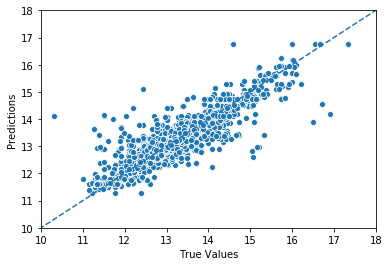

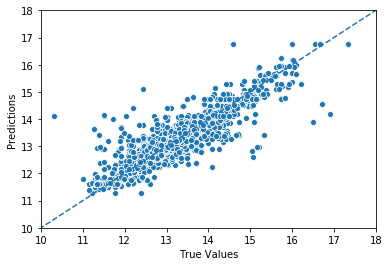

In [47]:
# plotted it to see how it compares with the actual values. This is for the decision tree model
sns.scatterplot(y_log_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(10,18)
plt.ylim(10,18)
vals = np.linspace(start = 0, stop = 18, num = 10)
plt.plot(vals,vals,linestyle='--')

In [48]:
final_df.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR006117,665000,17,196,3,20,7,1,3,148,2060000,71,9,1.0
CAR006652,528000,33,259,1,16,6,1,3,279,735000,22,1,1.0
CAR013853,595000,41,217,3,17,3,1,3,148,1025000,71,8,1.0
CAR013855,495000,41,217,3,16,3,1,3,148,1025000,71,7,1.0
CAR014569,250000,30,81,3,20,4,0,0,229,991800,62,27,1.0


,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR006117,665000,17,196,3,20,7,1,3,148,2060000,71,9,1.0
CAR006652,528000,33,259,1,16,6,1,3,279,735000,22,1,1.0
CAR013853,595000,41,217,3,17,3,1,3,148,1025000,71,8,1.0
CAR013855,495000,41,217,3,16,3,1,3,148,1025000,71,7,1.0
CAR014569,250000,30,81,3,20,4,0,0,229,991800,62,27,1.0


In [49]:
Xnew=[[23,132,1,2,3,1,2,121,900000,40,4,4500]]

In [50]:
ynew_pred=dec_tree.predict(Xnew)

In [51]:
np.exp(ynew_pred)

array([727285.29331488])

array([727285.29331488])

In [52]:
#time to do feature importance. set indep and dep vars appropriately
feature='price'
indepvar=final_df.drop('price',axis=1).columns
indepvar

Index(['brand', 'model', 'transmission', 'color', 'body_type', 'poster_type',
       'fuel_type', 'location', 'retail', 'post_age_in_days', 'age_of_car',
       'mileage_in_km'],
      dtype='object')

Index(['brand', 'model', 'transmission', 'color', 'body_type', 'poster_type',
       'fuel_type', 'location', 'retail', 'post_age_in_days', 'age_of_car',
       'mileage_in_km'],
      dtype='object')

In [53]:
# #print out the nodes. Shows you how dec tree splits
# import graphviz
# dot_data = tree.export_graphviz(dec_tree,out_file=None,feature_names=indepvar.tolist(),class_names='price')
# graph = graphviz.Source(dot_data)
# graph

In [54]:
# time for feature importance. Line below shows 0 is 50% important, 1 is 20% important but what is 0 and 1?
f_importance = dec_tree.feature_importances_
# f_list assigns the names of the indep variables so now we can say 0 is age so and so forth
f_list=X_train.columns
# this places it in a dataframe lang pinagsam yung nasa taas.
df_feature_importance=pd.DataFrame(f_importance,columns=['importance'],index=f_list).sort_values(['importance'],ascending=False)

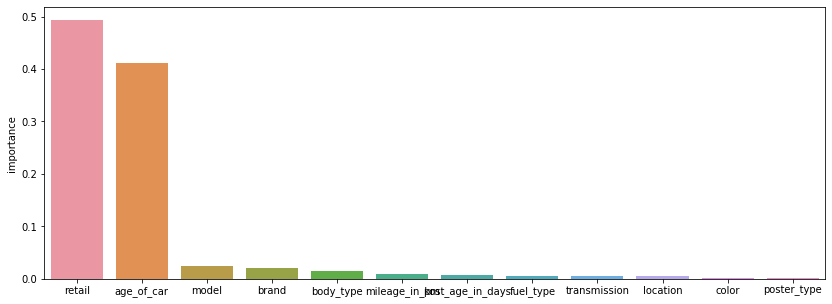

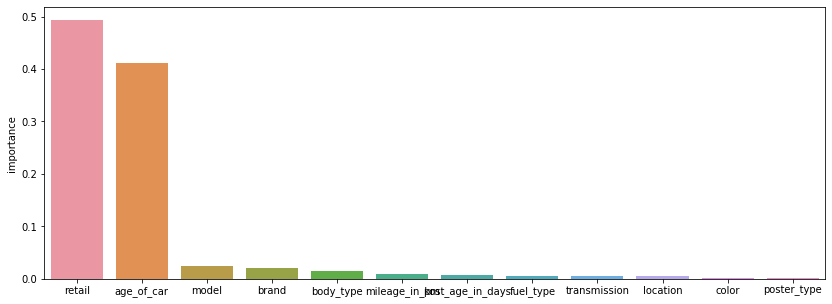

In [55]:
#plot the feature importance
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(df_feature_importance.index,df_feature_importance['importance'],data=df_feature_importance)
# plt.rcParams.update({'font.size': 10})

## Now that we have an idea on how the tree splits, let's try Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor(n_estimators=400,max_features=0.9157035175944501,min_samples_leaf=1,min_samples_split=5,oob_score=True,random_state=4)

In [58]:
# fit the train set to the random forest model
rf.fit(X_train, y_log_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.9157035175944501, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=True, random_state=4, verbose=0,
                      warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.9157035175944501, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=True, random_state=4, verbose=0,
                      warm_start=False)

In [59]:
# predicted values based on the fitted random forest
y_pred=rf.predict(X_test)
np.exp(y_pred)

array([ 524514.70040808,  644982.72981221,  602786.01355308, ...,
        369597.30184836, 1397367.65768286,  456278.74937823])

array([ 524514.70040808,  644982.72981221,  602786.01355308, ...,
        369597.30184836, 1397367.65768286,  456278.74937823])

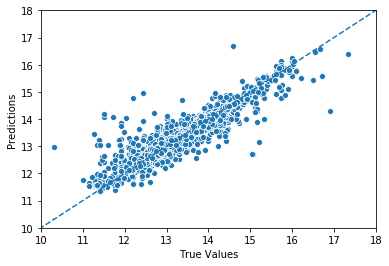

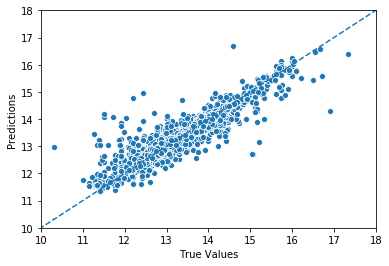

In [60]:
# This is plotting actual vs predicted based on random forest.
sns.scatterplot(y_log_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(10,18)
plt.ylim(10,18)
vals = np.linspace(start = 0, stop = 18, num = 10)
plt.plot(vals,vals,linestyle='--')

In [61]:
rf.oob_score_

0.8387959293508348

0.8387959293508348

In [62]:
f_list=X.columns
df_fi = pd.DataFrame(rf.feature_importances_,index=f_list,columns=['importance']).sort_values(['importance'],ascending=False)
df_fi

,importance
retail,0.423948
age_of_car,0.365971
mileage_in_km,0.042892
model,0.030790
location,0.027990
post_age_in_days,0.024834
body_type,0.022726
brand,0.021886
fuel_type,0.015670
color,0.012152


,importance
retail,0.423948
age_of_car,0.365971
mileage_in_km,0.042892
model,0.030790
location,0.027990
post_age_in_days,0.024834
body_type,0.022726
brand,0.021886
fuel_type,0.015670
color,0.012152


In [63]:
# checked cross val score
np.mean(cross_val_score(rf,X,y_log,cv=5))

0.7845494067185704

0.7845494067185704

In [72]:
print("Mean Squared Error:", metrics.mean_squared_error(y_pred, y_log_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_pred, y_log_test))

Mean Squared Error: 0.07042930510362362
Mean Absolute Error: 0.14426377982636054
Mean Squared Error: 0.07042930510362362
Mean Absolute Error: 0.14426377982636054


Text(0.5, 1.0, 'price vs age')

Text(0.5, 1.0, 'price vs age')

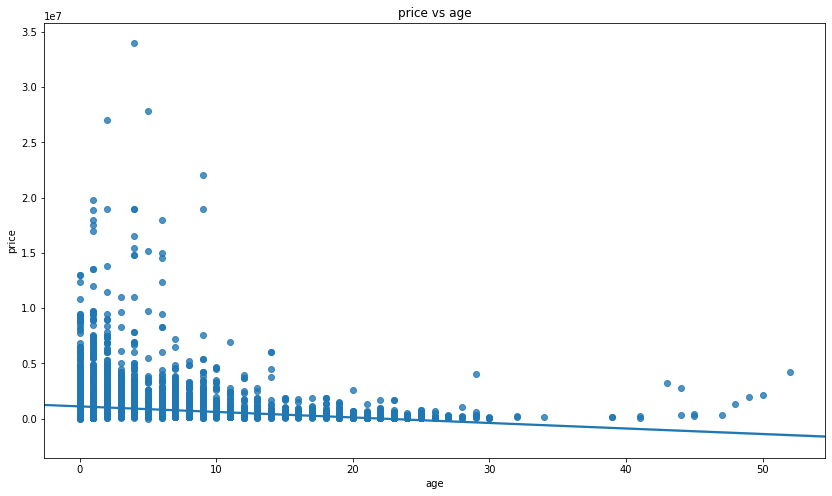

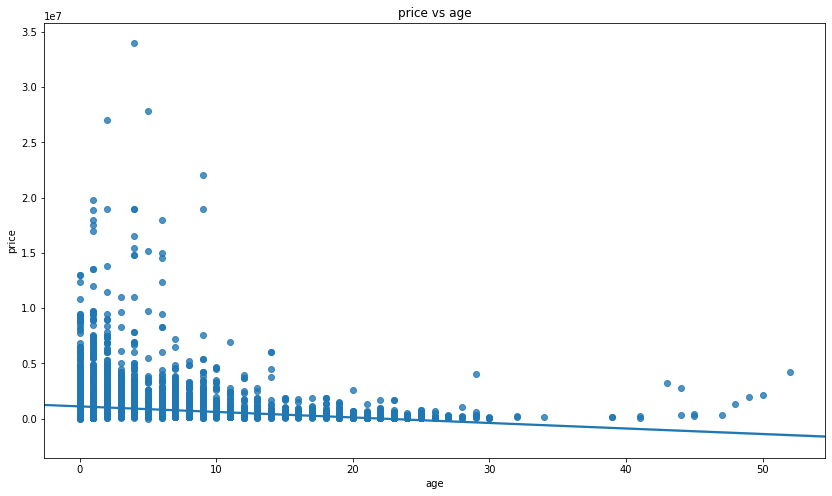

In [64]:
'''checked to see the lifetime value of the car. It seems like after 30 is crazy, and we'll be assuming it's a reworked car'''
plt.figure(figsize=(14,8))
sns.regplot(final_df['age_of_car'],np.exp(y_log))
plt.ylabel('price')
plt.xlabel('age')
plt.title('price vs age')

In [65]:
#this is the straight-line depreciation formula
dep_pred=X_test['retail']-(X_test['retail']/30*X_test['age_of_car'])

In [66]:
# checked straight-line depreciation
dep_df=final_df[['price','age_of_car']].copy()
dep_df=dep_df[dep_df['age_of_car']<=30]
dep_df['price']=np.log(dep_df['price'])

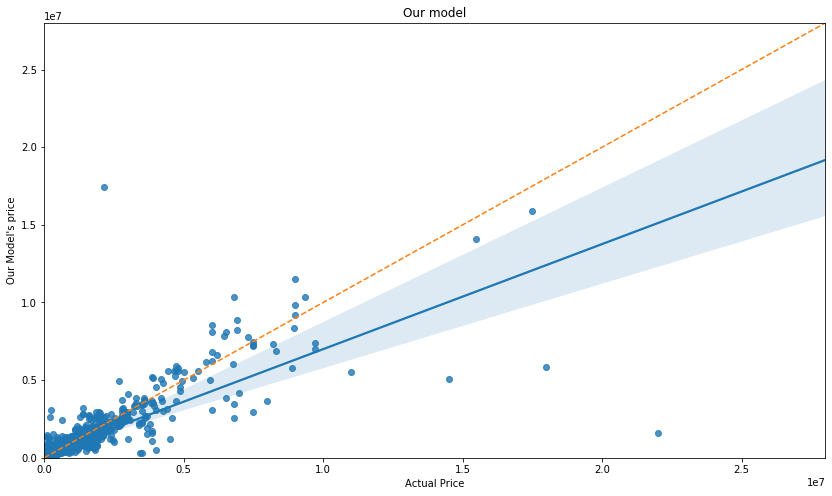

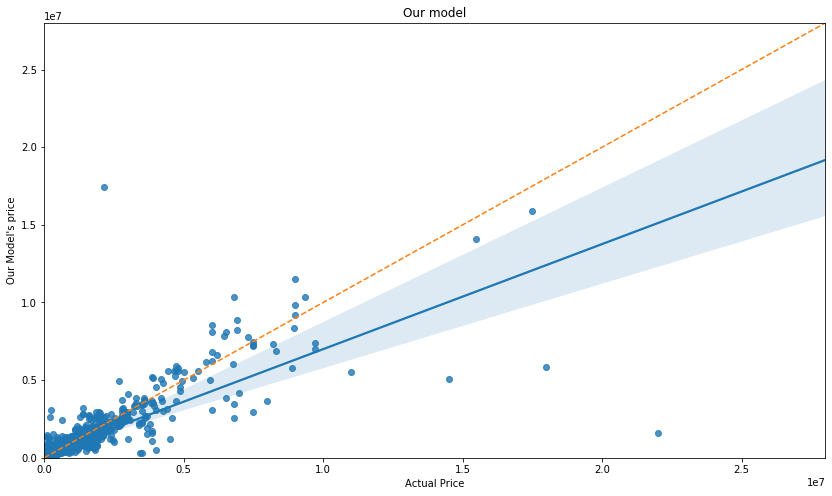

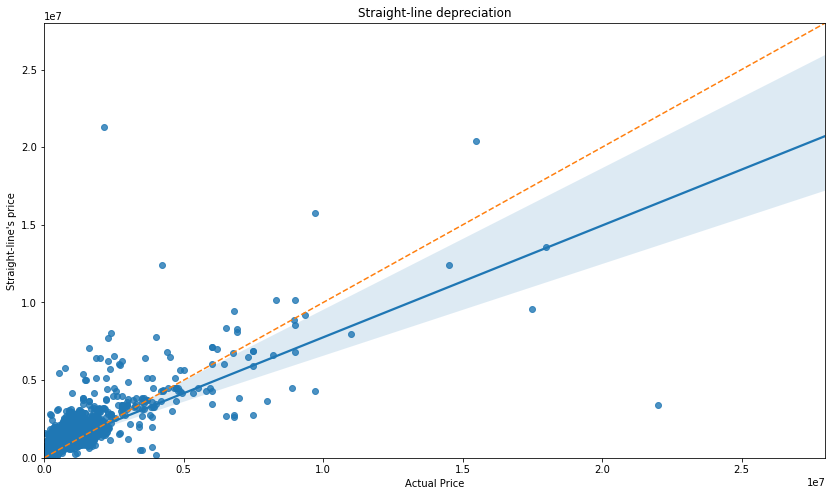

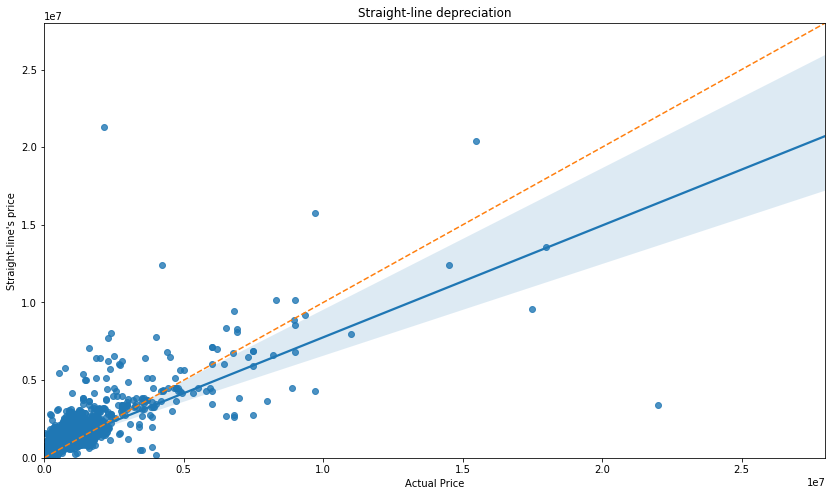

In [67]:
plt.figure(figsize=(14,8))
sns.regplot(np.exp(y_log_test),np.exp(y_pred))
plt.xlabel('Actual Price')
plt.ylabel('Our Model\'s price')
plt.title('Our model')
plt.xlim((0,2.8e7))
plt.ylim((0,2.8e7))
vals = np.linspace(start = 0, stop = 28000000, num = 100)
plt.plot(vals,vals,linestyle='--')


plt.figure(figsize=(14,8))
sns.regplot(np.exp(y_log_test),dep_pred)
plt.xlabel('Actual Price')
plt.ylabel('Straight-line\'s price')
plt.title('Straight-line depreciation')
plt.xlim((0,2.8e7))
plt.ylim((0,2.8e7))
plt.plot(vals,vals,linestyle='--')

## Decreasing Size of Model for Deployment

In [101]:
import pickle

In [102]:
rf_small = RandomForestRegressor(n_estimators=300,max_features=0.9157035175944501,min_samples_leaf=1,min_samples_split=5,oob_score=True,random_state=4)

In [103]:
rf_small.fit(X_train, y_log_train)
y_pred_small=rf_small.predict(X_test)
np.exp(y_pred_small)

array([ 524568.11124771,  643939.36413144,  601665.56244708, ...,
        369770.31662081, 1424878.70924451,  456993.49457965])

array([ 524568.11124771,  643939.36413144,  601665.56244708, ...,
        369770.31662081, 1424878.70924451,  456993.49457965])

In [104]:
print("Cross Val Score:", np.mean(cross_val_score(rf_small,X,y_log,cv=5)))
print("OOB Score:", rf_small.oob_score_)
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_small, y_log_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_pred_small, y_log_test))

Cross Val Score: 0.7844357401407243
OOB Score: 0.8386822351921314
Mean Squared Error: 0.07044283053213214
Mean Absolute Error: 0.14449954176865273
Cross Val Score: 0.7844357401407243
OOB Score: 0.8386822351921314
Mean Squared Error: 0.07044283053213214
Mean Absolute Error: 0.14449954176865273


In [105]:
with open("rf300.pickle", "wb") as pk:
    pickle.dump(rf_small, pk)

In [106]:
rf_200 = RandomForestRegressor(n_estimators=200,max_features=0.9157035175944501,min_samples_leaf=1,min_samples_split=5,oob_score=True,random_state=4)

In [107]:
rf_200.fit(X_train, y_log_train)
y_pred_200=rf_200.predict(X_test)
np.exp(y_pred_200)

array([ 529950.43822285,  644104.49195962,  600066.61313744, ...,
        367879.62049455, 1412689.80736082,  463841.56916035])

array([ 529950.43822285,  644104.49195962,  600066.61313744, ...,
        367879.62049455, 1412689.80736082,  463841.56916035])

In [108]:
print("200 Estimators")
print("Cross Val Score:", np.mean(cross_val_score(rf_200,X,y_log,cv=5)))
print("OOB Score:", rf_200.oob_score_)
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_200, y_log_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_pred_200, y_log_test))

200 Estimators
200 Estimators
Cross Val Score: 0.7840879387879134
OOB Score: 0.838291059504457
Mean Squared Error: 0.07058521177789737
Mean Absolute Error: 0.1448469318575079
Cross Val Score: 0.7840879387879134
OOB Score: 0.838291059504457
Mean Squared Error: 0.07058521177789737
Mean Absolute Error: 0.1448469318575079


In [109]:
with open("rf200.pkl", "wb") as pk:
    pickle.dump(rf_200, pk)

In [110]:
rf_100 = RandomForestRegressor(n_estimators=100,max_features=0.9157035175944501,min_samples_leaf=1,min_samples_split=5,oob_score=True,random_state=4)

In [111]:
rf_100.fit(X_train, y_log_train)
y_pred_100=rf_100.predict(X_test)
np.exp(y_pred_100)

array([ 514305.68409237,  641191.13064407,  600824.9075961 , ...,
        370854.58247186, 1381209.69619352,  474422.58194393])

array([ 514305.68409237,  641191.13064407,  600824.9075961 , ...,
        370854.58247186, 1381209.69619352,  474422.58194393])

In [112]:
print("100 Estimators")
print("Cross Val Score:", np.mean(cross_val_score(rf_100,X,y_log,cv=5)))
print("OOB Score:", rf_100.oob_score_)
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_100, y_log_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_pred_100, y_log_test))

100 Estimators
100 Estimators
Cross Val Score: 0.7825808285429257
OOB Score: 0.8356443612024134
Mean Squared Error: 0.0701518392380757
Mean Absolute Error: 0.14468730400460972
Cross Val Score: 0.7825808285429257
OOB Score: 0.8356443612024134
Mean Squared Error: 0.0701518392380757
Mean Absolute Error: 0.14468730400460972


In [113]:
with open("rf100.pkl", "wb") as pk:
    pickle.dump(rf_100, pk)

In [114]:
with open("rf100.pkl", "rb") as pk:
    rf_pickle = pickle.load(pk)

In [115]:
y_pickle = rf_pickle.predict(X_test)

In [120]:
metrics.r2_score(y_pred, y_pickle)

0.9986540796142629

0.9986540796142629